In [1]:
import os

base_dir = './'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['cat-dog.ipynb', 'input_dir', 'sampleSubmission.csv', 'test1', 'train', 'train.zip', 'validation']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [2]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg']
['dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg', 'dog.10005.jpg', 'dog.10006.jpg', 'dog.10007.jpg', 'dog.10008.jpg']


In [4]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 11500
total training dog images : 11500
total validation cat images : 1000
total validation dog images : 1000


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 64)      

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300, 300))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (300, 300))

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
1150/1150 - 68s - loss: 0.6569 - accuracy: 0.6918 - val_loss: 0.4708 - val_accuracy: 0.7870 - 68s/epoch - 59ms/step
Epoch 2/15
1150/1150 - 63s - loss: 0.4688 - accuracy: 0.7835 - val_loss: 0.4978 - val_accuracy: 0.7740 - 63s/epoch - 55ms/step
Epoch 3/15
1150/1150 - 64s - loss: 0.4141 - accuracy: 0.8170 - val_loss: 0.4411 - val_accuracy: 0.7995 - 64s/epoch - 55ms/step
Epoch 4/15
1150/1150 - 61s - loss: 0.3721 - accuracy: 0.8445 - val_loss: 0.4398 - val_accuracy: 0.8125 - 61s/epoch - 53ms/step
Epoch 5/15
1150/1150 - 62s - loss: 0.3369 - accuracy: 0.8585 - val_loss: 0.4484 - val_accuracy: 0.7995 - 62s/epoch - 54ms/step
Epoch 6/15
1150/1150 - 65s - loss: 0.3205 - accuracy: 0.8733 - val_loss: 0.4646 - val_accuracy: 0.7985 - 65s/epoch - 56ms/step
Epoch 7/15
1150/1150 - 63s - loss: 0.2993 - accuracy: 0.8850 - val_loss: 0.7132 - val_accuracy: 0.7810 - 63s/epoch - 55ms/step
Epoch 8/15
1150/1150 - 64s - loss: 0.2794 - accuracy: 0.8929 - val_loss: 0.5245 - val_accuracy: 0.8230 - 64s/ep

In [12]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Directory with unput pictures
input_dir = os.path.join('./input_dir/')

input_names = os.listdir(input_dir)

for fn in input_names:
    
    #predicting images
    path = input_dir + fn
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

1/1 [==============================] - 0s 324ms/step
[0.98270357]
1.jpg is a dog
1/1 [==============================] - 0s 22ms/step
[0.06734002]
10.jpg is a cat
1/1 [==============================] - 0s 18ms/step
[2.5185101e-12]
11.jpg is a cat
1/1 [==============================] - 0s 18ms/step
[0.97059464]
12.jpg is a dog
1/1 [==============================] - 0s 16ms/step
[0.0212001]
13.jpg is a cat
1/1 [==============================] - 0s 17ms/step
[0.00310848]
14.jpg is a cat
1/1 [==============================] - 0s 17ms/step
[0.00036618]
15.jpg is a cat
1/1 [==============================] - 0s 17ms/step
[0.00012364]
16.jpg is a cat
1/1 [==============================] - 0s 18ms/step
[1.]
17.jpg is a dog
1/1 [==============================] - 0s 18ms/step
[0.8540662]
18.jpg is a dog
1/1 [==============================] - 0s 17ms/step
[0.11331563]
19.jpg is a cat
1/1 [==============================] - 0s 17ms/step
[0.99982893]
2.jpg is a dog
1/1 [==============================]

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

1/1 [==============================] - 0s 65ms/step


C:\Users\homay\AppData\Local\Temp\ipykernel_15840\4014017501.py:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


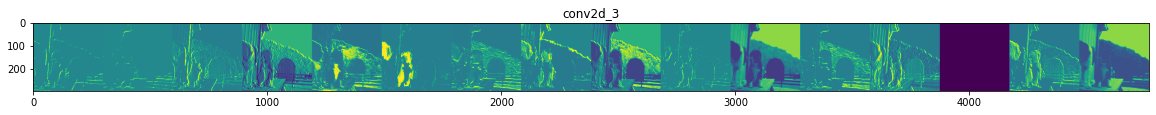

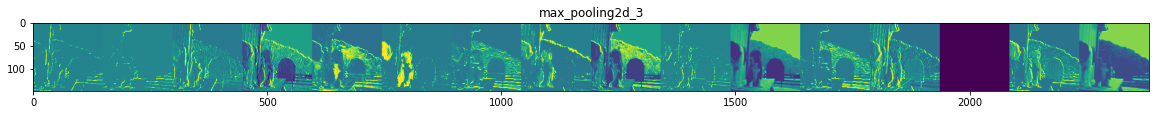

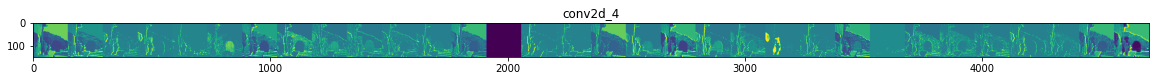

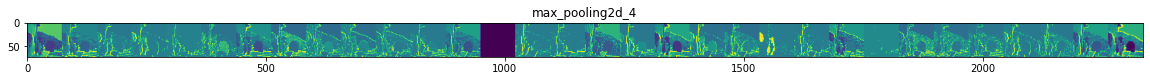

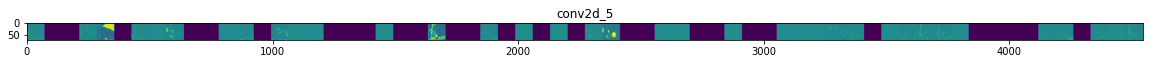

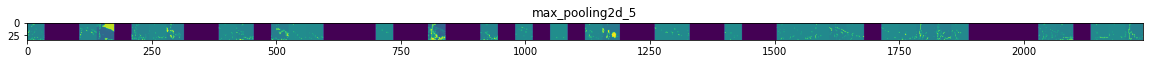

In [15]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (300, 300, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

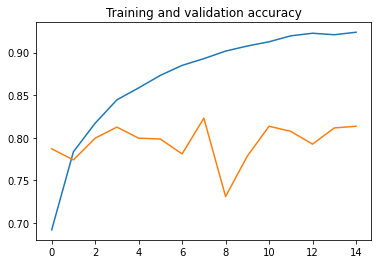

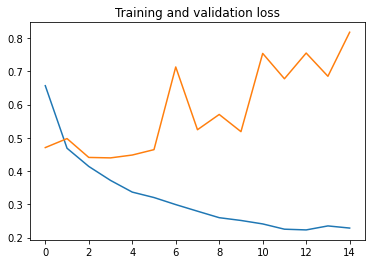

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )